In [8]:
import mlflow
from mlflow.tracking import MlflowClient

# Set the MLflow tracking URI if it's not set globally in the environment
mlflow.set_tracking_uri("http://mlflow_server:5000")

client = MlflowClient()

In [9]:
# List all experiments and print their names and IDs
experiments = client.search_experiments()  # This should correctly call the method
for experiment in experiments:
    print("Experiment ID:", experiment.experiment_id, "Name:", experiment.name)


Experiment ID: 1 Name: Fare_Prediction
Experiment ID: 0 Name: Default


In [10]:
import mlflow
from mlflow.tracking import MlflowClient

def find_best_model():
    client = MlflowClient()
    experiment_id = "1"  # Replace with your experiment ID

    # Query to get all runs in a specific experiment sorted by a metric (e.g., rmse)
    runs = client.search_runs(
        experiment_ids=experiment_id,
        order_by=["metrics.rmse ASC"],  # Adjust metric name if necessary
        max_results=1
    )
    runs1 = client.search_runs(
        experiment_ids=experiment_id,
        order_by=["metrics.rmse ASC"],  # Adjust metric name if necessary
        max_results=10
    )
    for i in runs1:
        print(i.data.metrics['rmse'])
    best_run = runs[0]
    print("Best Model Info:")
    print("  RMSE:", best_run.data.metrics['rmse'])
    print("  Model Type:", best_run.data.tags['model_type'])  # Assuming you have a tag 'model_type'
    print(best_run.info.run_id)
    return best_run.info.run_id, best_run.data.tags['model_type']

best_run_id, best_run_model = find_best_model()


0.281226230954996
0.3078727180307351
0.3078744647097964
0.3217742039583208
0.3295768295759648
0.3323242218361973
0.33248583424916167
0.3578360332611388
0.35784156963820557
0.3799868351578099
Best Model Info:
  RMSE: 0.281226230954996
  Model Type: DecisionTreeRegressorModel
ceec03033617495886cb5cb3aa14ed61


In [12]:
experiment_id = "1"
runs = client.search_runs(
    experiment_ids=[experiment_id],
    max_results=5  # Fetch a few runs to check metrics
)

for run in runs:
    print(f"Run ID: {run.info.run_id}")
    print("Metrics:", run.data.metrics)
    print("Parameters:", run.data.params)
    print("Tags:", run.data.tags)
    print("-" * 40)

Run ID: c7d3439804d345889db24db373ad3e6d
Metrics: {'rmse': 2.3815657069033747, 'r2': 0.9538995184808368}
Parameters: {'ccp_alpha': '0.0', 'criterion': 'squared_error', 'max_depth': '50', 'max_features': 'None', 'max_leaf_nodes': 'None', 'min_impurity_decrease': '0.0', 'min_samples_leaf': '1', 'min_samples_split': '5', 'min_weight_fraction_leaf': '0.0', 'random_state': 'None', 'splitter': 'best'}
Tags: {'mlflow.user': 'airflow', 'mlflow.source.name': '/usr/local/bin/airflow', 'mlflow.source.type': 'LOCAL', 'mlflow.runName': 'resilient-lamb-823', 'model_type': 'DecisionTreeRegressorModel', 'max_depth': '50', 'min_samples_split': '5', 'mlflow.log-model.history': '[{"run_id": "c7d3439804d345889db24db373ad3e6d", "artifact_path": "DecisionTreeRegressorModel", "utc_time_created": "2024-06-14 07:34:52.525793", "flavors": {"python_function": {"model_path": "model.pkl", "predict_fn": "predict", "loader_module": "mlflow.sklearn", "python_version": "3.11.4", "env": {"conda": "conda.yaml", "virtual

In [13]:
def load_model(run_id, best_run_model):
    model_uri = f"runs:/{run_id}/{best_run_model}"
    print(model_uri)
    model = mlflow.pyfunc.load_model(model_uri)
    return model

# Load the best model found
try:
    best_model = load_model(best_run_id, best_run_model)
except:
    best_model = load_model(best_run_id, 'model')

runs:/ceec03033617495886cb5cb3aa14ed61/DecisionTreeRegressorModel


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def load_model(run_id, model_type):
    try:
        model_uri = f"runs:/{run_id}/{model_type}"
        print(f"Attempting to load model from URI: {model_uri}")
        # Check if the model can be loaded without actually loading it
        model_path = mlflow.artifacts.download_artifacts(model_uri)
        print(f"Model path resolved to: {model_path}")
        model = mlflow.pyfunc.load_model(model_uri)
        return model
    except Exception as e:
        print(f"Failed to load model due to: {e}")
        return None

In [42]:
best_model1= load_model(best_run_id, best_run_model)

Attempting to load model from URI: runs:/ee47d812a6a94e49a578da226749e66f/DecisionTreeRegressor


Model path resolved to: /tmp/tmpnzc1l0ym/DecisionTreeRegressor


In [16]:
import mlflow
logged_model = 'runs:/ee47d812a6a94e49a578da226749e66f/DecisionTreeRegressor'
logged_model = '1/7f94f5f204384682a500e8cf29b2a7db/artifacts/MLPRegressor/model.pkl'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.

In [29]:
pip uninstall ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [30]:
!jupyter labextension list

JupyterLab v4.0.1
/opt/conda/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled  X (python, jupyterlab_pygments)
        jupyterlab-plotly v5.22.0 enabled  X
        nbdime-jupyterlab v2.2.0 enabled  X
        jupyter-matplotlib v0.11.3 enabled OK
        @jupyter-widgets/jupyterlab-manager v3.1.7 enabled  X (python, jupyterlab_widgets)
        @jupyterlab/git v0.41.0 enabled  X (python, jupyterlab-git)


   The following extensions are outdated:
        jupyterlab_pygments
        jupyterlab-plotly
        nbdime-jupyterlab
        @jupyter-widgets/jupyterlab-manager
        @jupyterlab/git
        
   Consider running "jupyter labextension update --all" to check for updates.

Other labextensions (built into JupyterLab)
   app dir: /opt/conda/share/jupyter/lab



In [20]:
l = [7721, 230, 45, 6775, 32, 876, 243, 87499, 723, 635, 2432, 321]


In [21]:
count= 0
profit = 0
countj = 0
days = {}
for i in l:
    count = count + 1
    countj = count
    for j in range(count, len(l)):
        iprofit = l[j]- i 
        if iprofit > profit:
            profit=iprofit
            days= {'day ' + str(count): i, 'day ' + str(countj+ 1): l[j]}
        countj = countj +1
        
print(profit, days)
         
        

87467 {'day 5': 32, 'day 8': 87499}


In [23]:
min_price = l[0]
max_profit =0

for price in l:
    profit = price - min_price
    max_profit = max(profit, max_profit)
    min_price = min(price, min_price)

print(max_profit)

87467


In [14]:
import boto3
from botocore.client import Config
from io import BytesIO
import joblib

def create_s3_client():
    s3_client = boto3.client('s3',
                             endpoint_url='http://172.27.0.2:9000',
                             aws_access_key_id='minioadmin',
                             aws_secret_access_key='minioadmin',
                             config=Config(signature_version='s3v4'),
                             region_name='us-east-1')
    return s3_client


def list_model_files(s3_client, bucket_name, best_run_id, model_type):
    response = s3_client.list_objects_v2(Bucket=bucket_name)
    model_files = [obj['Key'] for obj in response.get('Contents', []) if 'pkl' in obj['Key'] and  best_run_id in obj['Key'] and model_type in obj['Key']]
    return model_files


def download_and_load_model(s3_client, bucket_name, object_key):
    model_buffer = BytesIO()
    s3_client.download_fileobj(Bucket=bucket_name, Key=object_key, Fileobj=model_buffer)
    model_buffer.seek(0)  # Move to the start of the file before loading
    model = joblib.load(model_buffer)
    return model

def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions



def predict_data(df, best_run_id, model_type):
    # Define your bucket name and specific object key
    bucket_name = 'mlflow'
    s3_client = create_s3_client()
    # List all .pkl files in the bucket
    model_files = list_model_files(s3_client, bucket_name, best_run_id, model_type)
    print("Available model files:", model_files)

    # Assume you choose a specific model file to load
    if model_files:
        selected_model_file = model_files[0]  # Select the first model file
        model = download_and_load_model(s3_client, bucket_name, selected_model_file)

        # Assume X_test_subset is your test dataset loaded elsewhere
        predictions = make_predictions(model, df)
        print(type(predictions))
        print("Predictions:", predictions)
        return predictions
    else:
        print("No model files found.")
        return None

In [17]:
import pandas as pd

In [39]:
df = pd.read_csv('ms_iba/resources/inference6.csv')

In [62]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
print(os.getcwd())

def handle_missing_values(df, strategy='drop', columns=None):
    try:
        print('load complete')
        if strategy == 'drop':
            print('handle_missing_values complete')
            return df
        elif strategy == 'fill' and columns is not None:
            for column in columns:
                if df[column].dtype in ['float64', 'int64']:
                    df[column] = df[column].fillna(df[column].median())
                else:
                    df[column] = df[column].fillna(df[column].mode()[0])
            print('handle_missing_values complete')
            return df
    except Exception as e:
        raise ValueError(f"Error in handling missing values: {str(e)}")

def correct_data_types(df):
    try:
        datetime_format = '%m/%d/%Y %I:%M:%S %p'
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format=datetime_format, errors='coerce')
        df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format=datetime_format, errors='coerce')
        # df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        # df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
        return df
    except Exception as e:
        raise ValueError(f"Error in correcting data types: {str(e)}")

# def correct_data_types(df):
#     try:
#         print(df.columns)
#         datetime_format = '%m/%d/%Y %I:%M:%S %p'
#         if 'tpep_pickup_datetime' not in df.columns or 'tpep_dropoff_datetime' not in df.columns:
#             raise KeyError("DataFrame does not contain required datetime columns.")

#         print("Before conversion:", df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())
        
#         df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format=datetime_format, errors='coerce')
#         df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format=datetime_format, errors='coerce')
        
#         print("After conversion:", df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())

#     except Exception as e:
#         raise ValueError(f"Error in correcting data types: {str(e)}")

def remove_duplicates(df):
    try:
        return df.drop_duplicates()
    except Exception as e:
        raise ValueError(f"Error in removing duplicates: {str(e)}")

def sanity_checks(df):
    try:
        conditions = (
            (df['passenger_count'] == 0) |
            (df['trip_distance'] == 0) |
            # (df['fare_amount'] < 0) |
            (df['total_amount'] < 0)
        )
        df_cleaned = df[~conditions]
        return df_cleaned
    except Exception as e:
        raise ValueError(f"Error in performing sanity checks: {str(e)}")
    
def extract_time_features(df):
    try:
        print(df['tpep_pickup_datetime'].dtype)
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
        print(df['tpep_pickup_datetime'].dtype)
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
        df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
        df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
        df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0
        print(df.head(10))
        return df
    except Exception as e:
        raise Exception(f"Error in extract_time_features: {str(e)}")

def calculate_distance_rate(df):
    try:
        df['fare_per_mile'] = df.apply(lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] != 0 else 0, axis=1)
        return df
    except Exception as e:
        raise Exception(f"Error in calculate_distance_rate: {str(e)}")

def feature_engineering_pipeline(df):
    """
    A pipeline function that applies all feature engineering functions.
    :param df: DataFrame to be processed.
    :returns: DataFrame with all features engineered.
    """
    try:
        df = extract_time_features(df)
    except Exception as e:
        raise Exception(f"Error in extracting time features: {str(e)}")
    
    # try:
    #     df = calculate_distance_rate(df)
    # except Exception as e:
    #     raise Exception(f"Error in calculating distance rate: {str(e)}")
    
    # Example of how you might include encoding if uncommented
    # try:
    #     df = encode_categorical_features(df, ['pickup_day_of_week', 'payment_type'])
    # except Exception as e:
    #     raise Exception(f"Error in encoding categorical features: {str(e)}")
    
    return df


def execute_feature_engineering_pipeline(df, chunk_size=50000):
    """
    Process the DataFrame in chunks and apply feature engineering.
    :param df: DataFrame to be processed.
    :param chunk_size: Number of rows per chunk.
    :returns: DataFrame with all features engineered concatenated from all chunks.
    """
    try:
        # Calculate the number of chunks
        num_chunks = int(np.ceil(len(df) / chunk_size))
        
        # Split the DataFrame into chunks
        chunks = np.array_split(df, num_chunks)
        
        # List to store each chunk after processing
        chunk_list = []
        
        # Process each chunk
        for chunk in chunks:
            try:
                chunk_processed = feature_engineering_pipeline(chunk)
                chunk_list.append(chunk_processed)
            except Exception as e:
                raise Exception(f"Error processing chunk: {str(e)}")
        
        # Concatenate all processed chunks into a single DataFrame
        engineered_df = pd.concat(chunk_list, ignore_index=True)
        return engineered_df
    except Exception as e:
        raise Exception(f"Error in processing chunks: {str(e)}")

def apply_cyclic_encoding(df, column_name):
    try:
        day_to_num = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
        df['day_number'] = df[column_name].map(day_to_num)
        if df['day_number'].isna().any():
            missing_values = df[df['day_number'].isna()][column_name].unique()
            raise ValueError(f"Mapping not found for: {missing_values}")
        df['day_sin'] = np.sin(2 * np.pi * df['day_number'] / 7)
        df['day_cos'] = np.cos(2 * np.pi * df['day_number'] / 7)
        df.drop('day_number', axis=1, inplace=True)
        
        return df
    except Exception as e:
        raise Exception(f"Error in apply_cyclic_encoding: {str(e)}")

def typecasting_variables(df):
    try:
        df['VendorID'] = df['VendorID'].astype(int).astype(str)
        
        return df
    except Exception as e:
        raise Exception(f"Error in typecasting_variables: {str(e)}")

def feature_selection(df, fare_prediction_columns):
    try:
        fare_prediction_df = df[fare_prediction_columns]
        return fare_prediction_df
    except Exception as e:
        raise Exception(f"Error in feature_selection: {str(e)}")
    
def scale_features(df, columns_to_scale):
    """
    Scale selected features in a DataFrame using StandardScaler.

    Args:
    df (DataFrame): The DataFrame containing the data.
    columns_to_scale (list): A list of column names in the DataFrame to be scaled.

    Returns:
    DataFrame: The DataFrame with the specified columns scaled.
    """
    try:
        # Initialize the StandardScaler
        scaler = StandardScaler()

        # Check if all columns exist in the DataFrame
        missing_columns = [col for col in columns_to_scale if col not in df.columns]
        if missing_columns:
            raise ValueError(f"The following columns are missing from the DataFrame: {missing_columns}")

        # Fit and transform the selected columns
        df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

        
        return df
    except Exception as e:
        raise Exception(f"Error scaling features: {str(e)}")

def encode_categorical_features(df, base_features, categorical_vars):
    """
    Prepare the DataFrame for modeling by converting specified categorical variables
    to dummy variables and compiling a complete list of features.
    
    Args:
    df (DataFrame): The input data frame.
    base_features (list): List of base feature names to be included.
    categorical_vars (list): List of categorical variable names to be one-hot encoded.

    Returns:
    DataFrame, list: The modified DataFrame and the complete list of feature names.
    """
    try:
        # Check if specified categorical variables exist in the DataFrame
        missing_vars = [var for var in categorical_vars if var not in df.columns]
        if missing_vars:
            raise ValueError(f"Missing columns in DataFrame that are specified for encoding: {missing_vars}")

        # Convert specified categorical variables to category data type
        for var in categorical_vars:
            df[var] = df[var].astype('category')

        # Apply one-hot encoding to the specified categorical variables
        df = pd.get_dummies(df, columns=categorical_vars)

        # Initialize the feature list with the base features
        features = base_features[:]

        # Dynamically add features for each categorical variable
        for var in categorical_vars:
            features.extend([col for col in df.columns if col.startswith(var + '_')])

        return df, features
    except Exception as e:
        raise Exception(f"Failed to encode categorical features: {str(e)}")
    

def prepare_data_for_modeling(df, base_features, categorical_vars):
    """
    Prepare the DataFrame for modeling by encoding categorical variables,
    extracting features, and separating the target variable.

    Args:
    df (DataFrame): The input DataFrame.
    base_features (list): List of base feature names to be included.
    categorical_vars (list): List of categorical variable names to be one-hot encoded.
    target_variable (str): Name of the column to use as the target variable.

    Returns:
    DataFrame, Series, list: Feature DataFrame (X), target variable Series (y), and list of feature names.
    """
    try:
        # Encode categorical features and update feature list
        encoded_df, features = encode_categorical_features(df, base_features, categorical_vars)
        # Extract the features for the model
        X = encoded_df[features]
        # Extract the target variable
        return X
    except Exception as e:
        raise Exception(f"Error preparing data for modeling: {str(e)}")

def align_features(base_df, target_df):
    # Add missing columns to the target_df with all zeros
    missing_cols = set(base_df.columns) - set(target_df.columns)
    for c in missing_cols:
        target_df[c] = 0
    # Ensure the order of columns in the target_df matches that of base_df
    target_df = target_df[base_df.columns]
    return target_df
    

def execute_inference_pipeline(df):
    try:
        base_df = pd.read_csv('ms_iba/resources/training_features.csv')

        # Handle missing values
        df = handle_missing_values(df, strategy='drop', columns=None)
        print("Missing values handled.")
        print(len(df))

        # Correct data types
        df = correct_data_types(df)
        print("Data types corrected.")
        print(len(df))

        # Remove duplicates
        df = remove_duplicates(df)
        print("Duplicates removed.")
        print(len(df))

        # Perform sanity checks
        # df = sanity_checks(df)
        print("Sanity checks completed.")
        print(len(df))

        # Apply cyclic encoding
        df= execute_feature_engineering_pipeline(df, chunk_size=50000)
        print(len(df))

        # Apply cyclic encoding
        df = apply_cyclic_encoding(df, 'pickup_day_of_week')
        print("Cyclic encoding applied.")
        print(len(df))

        df = typecasting_variables(df)
        fare_prediction_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
                                        'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'trip_duration',
                                        'congestion_surcharge', 'pickup_hour', 'day_sin', 'day_cos',
                                        'pickup_month'
                                    ]
        df = feature_selection(df, fare_prediction_columns)
        print(len(df))

        # Scale features
        columns_to_scale = ['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID', 'DOLocationID', 'trip_duration']
        df = scale_features(df, columns_to_scale)
        print("Features scaled.")
        print(len(df))

        # Encode categorical features
        base_features = ['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID', 'DOLocationID', 'trip_duration']
        categorical_vars = ['VendorID', 'RatecodeID', 'store_and_fwd_flag' ]
        # Prepare data for modeling
        X = prepare_data_for_modeling(df, base_features, categorical_vars)
        print("Categorical features encoded.")
        print("Data prepared for modeling.")

        processed_data = align_features(base_df, X)
        print("All processing steps completed successfully.")
        return processed_data
    except Exception as e:
        print(f"An error occurred: {str(e)}")



/home/jovyan/notebooks


In [63]:
processed_data = execute_inference_pipeline(df)

load complete
handle_missing_values complete
Missing values handled.
500
Data types corrected.
500
Duplicates removed.
500
Sanity checks completed.
500
datetime64[ns]
datetime64[ns]
   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      400000       2.0  2020-01-03 13:12:45   2020-01-03 13:17:04   
1      400001       2.0  2020-01-03 13:22:19   2020-01-03 13:29:18   
2      400002       2.0  2020-01-03 13:46:58   2020-01-03 13:56:07   
3      400003       2.0  2020-01-03 13:08:48   2020-01-03 13:29:43   
4      400004       2.0  2020-01-03 13:10:14   2020-01-03 13:19:30   
5      400005       2.0  2020-01-03 13:25:39   2020-01-03 13:38:41   
6      400006       2.0  2020-01-03 13:53:31   2020-01-03 13:57:45   
7      400007       2.0  2020-01-03 13:29:02   2020-01-03 13:47:11   
8      400008       2.0  2020-01-03 13:54:53   2020-01-03 14:17:28   
9      400009       2.0  2020-01-03 13:23:23   2020-01-03 13:39:17   

   passenger_count  trip_distance  RatecodeID s

In [64]:
y_pred = best_model.predict(pd.DataFrame(processed_data[['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID',
       'DOLocationID', 'trip_duration', 'VendorID_1', 'VendorID_2',
       'RatecodeID_1.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y']]))

In [65]:
df2 = pd.DataFrame(y_pred)

In [66]:
df2.describe()

,0
count,500.000000
mean,9.132251
std,3.399178
min,3.779770
25%,6.515973
50%,6.515973
75%,12.069843
max,15.121639


In [ ]:
import matplotlib.pyplot as plt


# Plotting the columns
plt.figure(figsize=(10, 6))
plt.plot(df['Column1'], df['fare_amount'], marker='o', linestyle='-', color='b', label='Column2 vs Column1')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.title('Plot of Column2 vs Column1')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
df[['fare_amount']].describe()

,fare_amount
count,500.00000
mean,10.99964
std,10.43486
min,-52.00000
25%,6.00000
50%,8.00000
75%,11.50000
max,74.00000


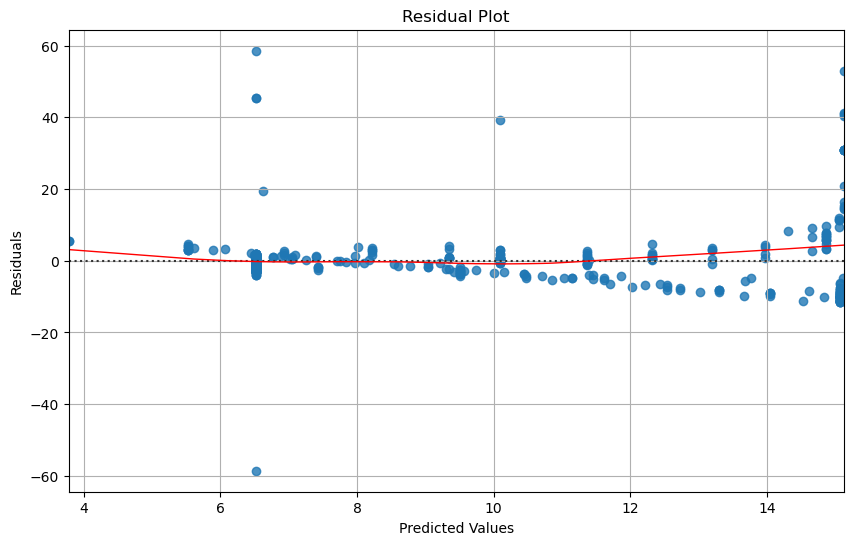

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `predictions` and `y_test` are available
residuals = df['fare_amount'] - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(df['fare_amount'], y_pred)
print(f'R² Score: {r2}')
rmse = np.sqrt(mean_squared_error(df['fare_amount'], y_pred))
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.2229372983135569
Root Mean Squared Error: 9.189247002715277


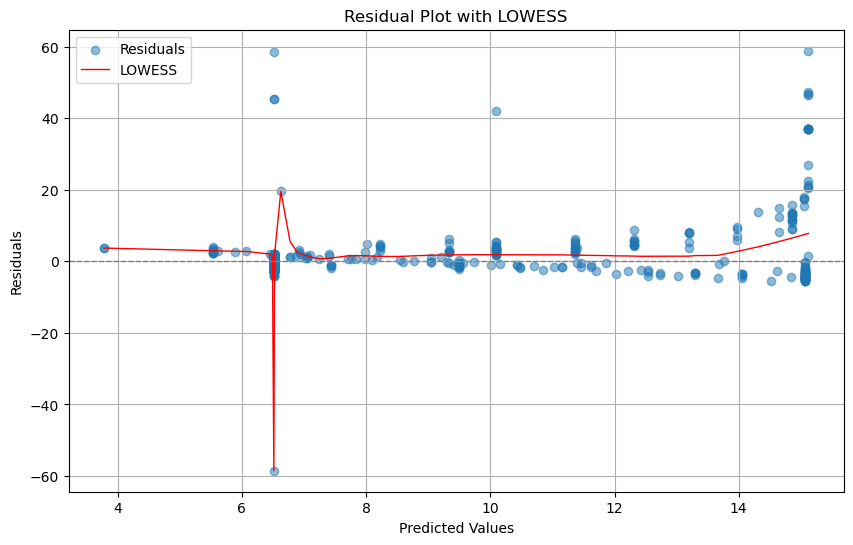

In [80]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, label='Residuals')

# Fit and plot LOWESS line
lowess = sm.nonparametric.lowess
lowess_results = lowess(residuals, y_pred, frac=0.25        plt.figure(figsize=(10, 6))
        sns.residplot(x=results['Predicted'], y=results['Residuals'], lowess=True, line_kws={'color': 'red', 'lw': 1})
        plt.title('Residual Plot')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.grid(True)
        plt.show())
plt.plot(lowess_results[:, 0], lowess_results[:, 1], color='red', lw=1, label='LOWESS')

# Plot settings
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot with LOWESS')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
predictions = predict_data(processed_data[['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID',
       'DOLocationID', 'trip_duration', 'VendorID_1', 'VendorID_2',
       'RatecodeID_1.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y']], best_run_id, best_run_model)

Available model files: ['1/7f876f7762d24b2f9940f0db826937de/artifacts/MLPRegressorModel/model.pkl']
<class 'numpy.ndarray'>
Predictions: [ -7.05029314  -3.48814829  -5.82514689  -7.8081971  -10.44644058
   1.36819365  15.27018986   8.82851988  13.85979441  -3.55806903
  18.51186309   2.9267144  -12.06168053  14.98862882  19.54644987
   6.3716451   13.37993358  10.45756137  16.97838452  -2.35960714
  -7.05715219  15.88526051   3.13034503  -4.24330885  17.93136654
  -5.5269702    2.0382354   -3.2604652  -10.33742954  11.9746238
   8.02150234  10.78318731  -9.88380144   2.61526451   1.52592714
  -4.81344302   7.73274713  -8.74243213 -10.13196278 -10.25107246
 -10.47513619  -1.88528677  13.97234284  10.95093381  -4.92672125
  11.31626615  18.9645246   -5.96880213   6.28967698  20.41745608
  15.91334141  -1.74537272  -5.00184274   7.08692691  16.95845287
   5.03548494  13.6149332   19.08989393  -3.62367336  18.91428338
  17.41564486  14.20036477   1.40068337  19.83568076  25.00385539
   5.2

In [26]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [59]:
len(processed_data)

481

In [72]:
len(processed_data)
# for i in processed_data:
#     best_model.predict(i)
#     processed_data_copy['predicted'] = 

95

In [7]:
dir(best_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model_impl',
 '_model_meta',
 '_predict_fn',
 'loader_module',
 'metadata',
 'model_config',
 'predict',
 'unwrap_python_model']

In [52]:
from sklearn.pipeline import Pipelinemetadata_path = 'path_to_metadata/metadata.json'
with open(metadata_path, 'r') as f:
    metadata = json.load(f)
    feature_names = metadata['feature_names']
    print("Feature columns from metadata: ", feature_names)

In [53]:
if isinstance(best_model1, Pipeline) and hasattr(best_model1, 'named_steps'):
    # Assuming the preprocessing step is named 'preprocessor' and is a ColumnTransformer
    if 'preprocessor' in best_model1.named_steps and hasattr(best_model1.named_steps['preprocessor'], 'transformers_'):
        transformers = best_model1.named_steps['preprocessor'].transformers_
        feature_names = []
        for name, transformer, columns in transformers:
            # This assumes that columns are explicitly named or indices are provided
            feature_names.extend(columns)
        print("Feature columns: ", feature_names)
    else:
        print("No preprocessor with transformers found in pipeline.")
else:
    print("Model is not a pipeline or does not have named steps.")

Model is not a pipeline or does not have named steps.


In [61]:
import sklearn
import numpy
import joblib

print("SciKit-Learn version:", sklearn.__version__)
print("NumPy version:", numpy.__version__)
print("Joblib version:", joblib.__version__)

SciKit-Learn version: 1.2.2
NumPy version: 1.24.3
Joblib version: 1.2.0


In [63]:
print("Joblib version:", mlflow.__version__)

Joblib version: 2.11.1


In [65]:
print("Joblib version:", boto3.__version__)

Joblib version: 1.34.61


In [27]:
df1 = pd.read_csv('ms_iba/resources/inference.csv')

In [28]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238.0,239.0,1.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239.0,238.0,1.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238.0,238.0,1.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238.0,151.0,1.0,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193.0,193.0,2.0,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,01/01/2020 12:37:27 AM,01/01/2020 12:50:39 AM,2.0,2.33,1.0,N,143.0,236.0,1.0,0.5,0.5,2.00,0.0,0.3,16.80,2.5
96,2.0,01/01/2020 12:53:56 AM,01/01/2020 01:13:51 AM,1.0,3.75,1.0,N,236.0,107.0,1.0,0.5,0.5,2.00,0.0,0.3,21.30,2.5
97,1.0,01/01/2020 12:14:05 AM,01/01/2020 12:40:50 AM,2.0,2.10,1.0,N,48.0,107.0,1.0,3.0,0.5,4.05,0.0,0.3,24.35,2.5
98,2.0,01/01/2020 12:14:44 AM,01/01/2020 12:23:35 AM,1.0,1.78,1.0,N,161.0,141.0,2.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5


In [2]:
def test():
    return 1,2,4,6

In [6]:
a,b,c,d= test()

In [7]:
print(a)

1


In [24]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,2020-01-01 00:37:27,2020-01-01 00:50:39,2.0,2.33,1.0,N,143.0,236.0,1.0,0.5,0.5,2.00,0.0,0.3,16.80,2.5
96,2.0,2020-01-01 00:53:56,2020-01-01 01:13:51,1.0,3.75,1.0,N,236.0,107.0,1.0,0.5,0.5,2.00,0.0,0.3,21.30,2.5
97,1.0,2020-01-01 00:14:05,2020-01-01 00:40:50,2.0,2.10,1.0,N,48.0,107.0,1.0,3.0,0.5,4.05,0.0,0.3,24.35,2.5
98,2.0,2020-01-01 00:14:44,2020-01-01 00:23:35,1.0,1.78,1.0,N,161.0,141.0,2.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5


In [26]:
df['tpep_pickup_datetime'].max().date()

datetime.date(2020, 1, 1)